In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  
import seaborn as sns


In [3]:
train_data = pd.read_csv("C:/Users/mowma/Downloads/playground-series-s6e1/train.csv")
test_data = pd.read_csv("C:/Users/mowma/Downloads/playground-series-s6e1/test.csv")

This data is super clean

In [4]:

train_data.head(10)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


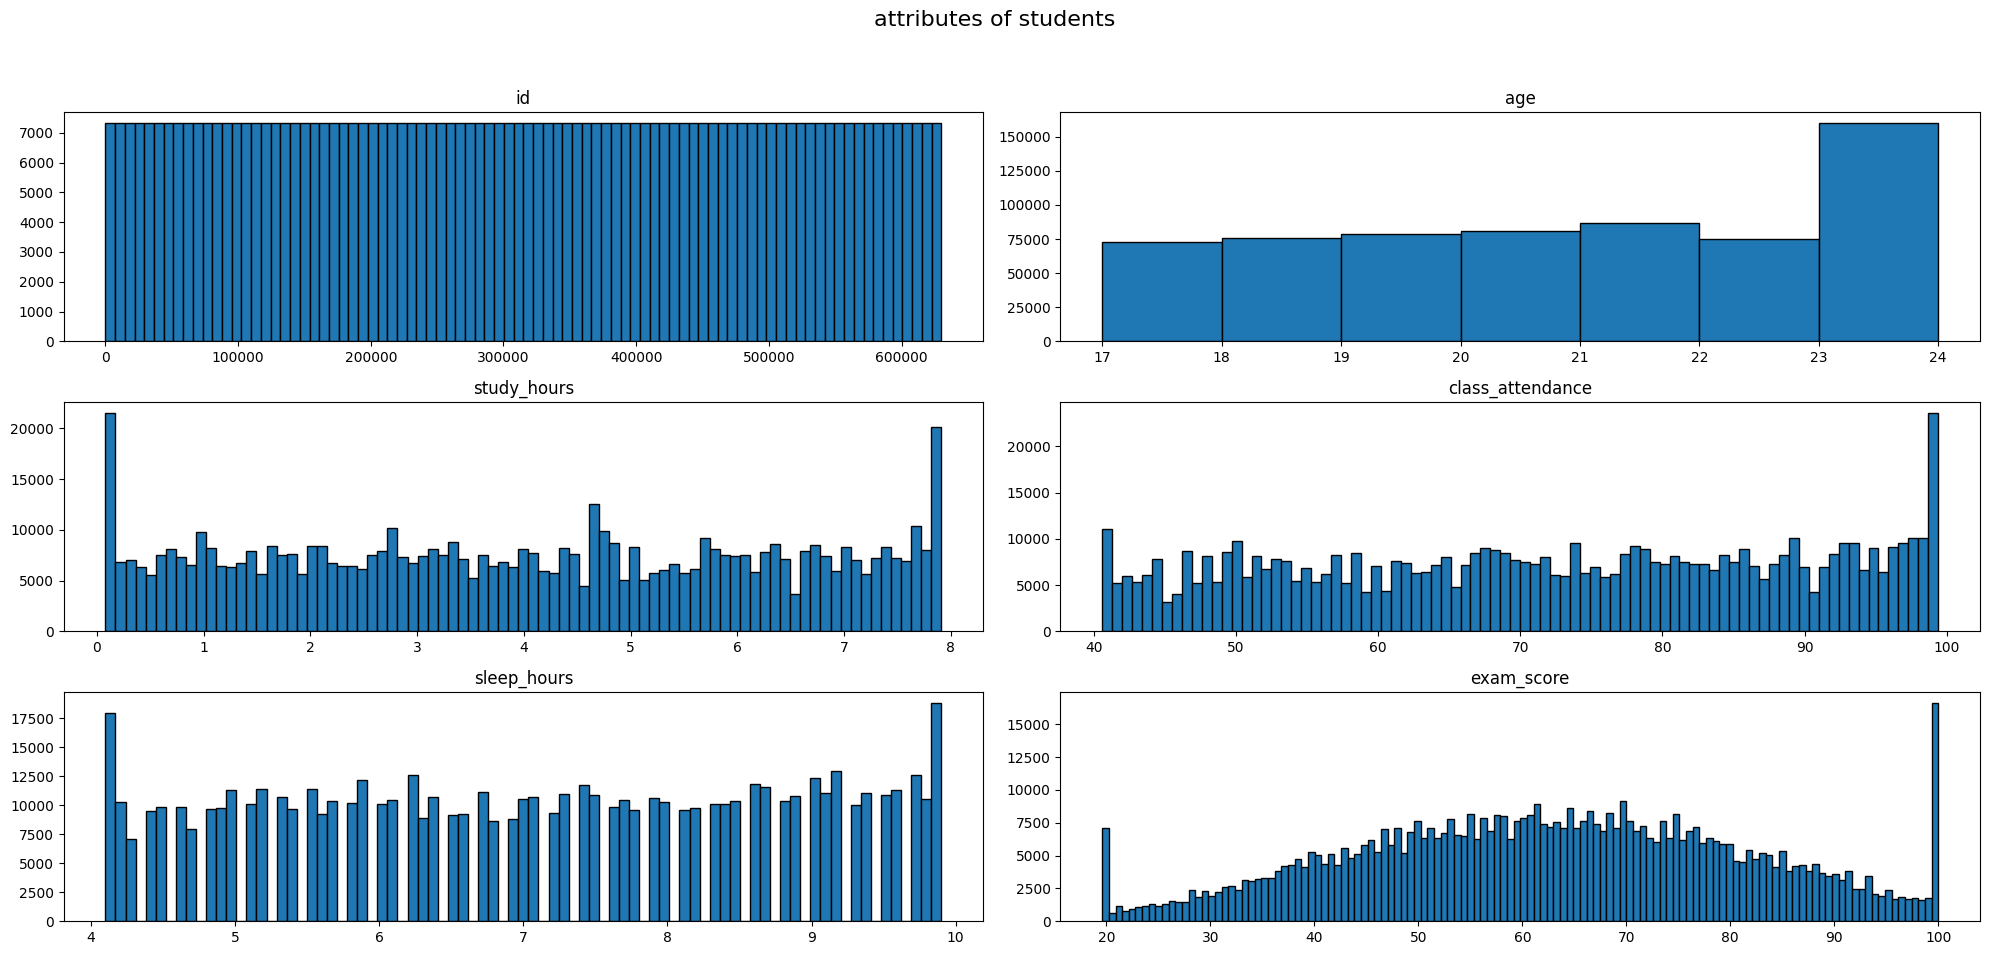

In [5]:
train_data.hist(
    bins='auto',
    figsize=(20,10),
    edgecolor='black',
    grid=False,
    alpha=1
)

plt.suptitle("attributes of students", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

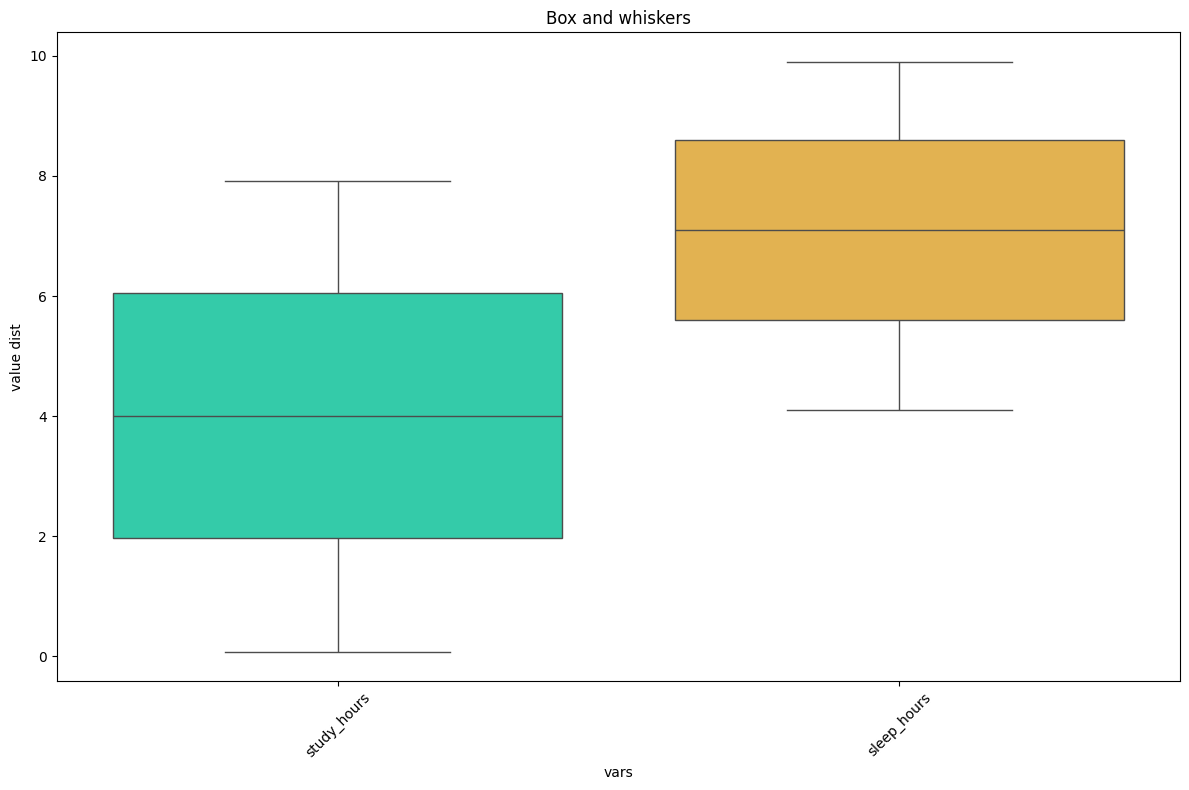

In [11]:
features_interest = ['study_hours', 'sleep_hours', ]

plt.figure(figsize=(12, 8))
sns.boxplot(data=train_data[features_interest], palette='turbo')
plt.title('Box and whiskers')
plt.xlabel('vars')
plt.ylabel('value dist')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
descriptive_stats = train_data.describe()
print(descriptive_stats)

                  id            age    study_hours  class_attendance  \
count  630000.000000  630000.000000  630000.000000     630000.000000   
mean   314999.500000      20.545821       4.002337         71.987261   
std    181865.479132       2.260238       2.359880         17.430098   
min         0.000000      17.000000       0.080000         40.600000   
25%    157499.750000      19.000000       1.970000         57.000000   
50%    314999.500000      21.000000       4.000000         72.600000   
75%    472499.250000      23.000000       6.050000         87.200000   
max    629999.000000      24.000000       7.910000         99.400000   

         sleep_hours     exam_score  
count  630000.000000  630000.000000  
mean        7.072758      62.506672  
std         1.744811      18.916884  
min         4.100000      19.599000  
25%         5.600000      48.800000  
50%         7.100000      62.600000  
75%         8.600000      76.300000  
max         9.900000     100.000000  


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['age','study_hours','class_attendance','sleep_hours']
train_data_scaled = train_data.copy()
train_data_scaled = train_data_scaled[numerical_features]
train_data_scaled = scaler.fit_transform(train_data_scaled)

train_data_scaled = pd.DataFrame(train_data_scaled, columns=numerical_features)



<Axes: >

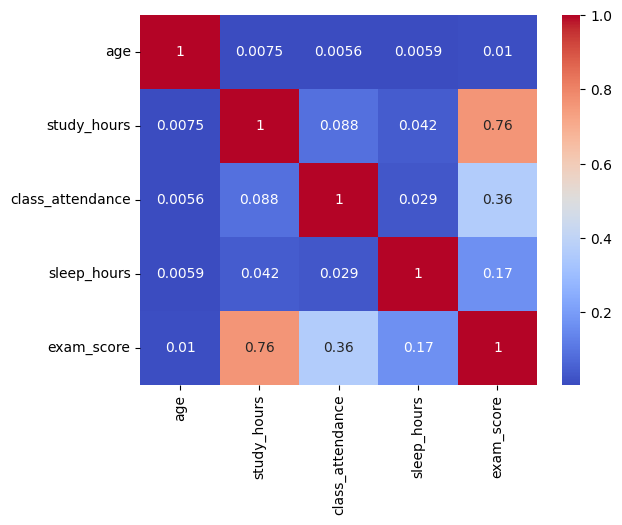

In [27]:
sns.heatmap(train_data_scaled.corr(),annot=True,cmap='coolwarm')

We can See study Hours having the highest coprrelation to exam score here, decided to standard scale

In [ ]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                270000 non-null  int64  
 1   age               270000 non-null  int64  
 2   gender            270000 non-null  object 
 3   course            270000 non-null  object 
 4   study_hours       270000 non-null  float64
 5   class_attendance  270000 non-null  float64
 6   internet_access   270000 non-null  object 
 7   sleep_hours       270000 non-null  float64
 8   sleep_quality     270000 non-null  object 
 9   study_method      270000 non-null  object 
 10  facility_rating   270000 non-null  object 
 11  exam_difficulty   270000 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 24.7+ MB


In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [ ]:
candidate_features = [
    'age','gender','course','study_hours','class_attendance','internet_access',
    'sleep_hours','sleep_quality','study_method','exam_difficulty','facility_rating'
]

X_train = train_data[candidate_features].copy()
y_train = train_data["exam_score"].copy()
X_test  = test_data[candidate_features].copy()

cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X_train.select_dtypes(include=["number", "bool"]).columns.tolist()

pre = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop"
)

model = XGBRegressor(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

pipe = Pipeline([("prep", pre), ("model", model)])

pipe.fit(X_train, y_train)
preds = pipe.predict(X_test)


In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_1 = train_data[candidate_features].copy()
y_1 = train_data['exam_score'].copy()

X_tr, X_val, y_tr, y_val = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
pipe.fit(X_tr,y_tr)
y_pred=pipe.predict(X_val)

rmse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)        
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE : {mae:.3f}")
print(f"R^2 : {r2:.3f}")


RMSE: 76.881
MAE : 6.993
R^2 : 0.784


In [69]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    pipe, X_1, y_1, cv=5, scoring='neg_mean_squared_error'
)

rmse_cv = -scores

print("CV RMSE (mean):", rmse_cv.mean())
print("CV RMSE (std) :", rmse_cv.std())

CV RMSE (mean): 77.09620006430062
CV RMSE (std) : 0.2307374626525687
